<font size=6>1.4.深层神经网络</font>
# 回顾
1. 逻辑回归
2. 参数初始化
2. 前向传播、激活单元、损失函数、代价函数、后向传播
3. 梯度下降-参数更新
4. 向量化
5. etc

## 逻辑回归和浅层神经网络
<img src='../images/7c1cc04132b946baec5487ba68242362.png'>

## 神经网络层数的定义
1. 从左到右
3. 去除输入层
4. 包含输出层
4. 逻辑回归是一个一层的神经网络
5. 层数=隐含层数+1
<img src='../images/be71cf997759e4aeaa4be1123c6bb6ba.png'>

## 案例
1. $L:$表示层数，$L=4$
2. $n^{[l]}:$表示第$l$层的节点(或特征)数，eg.$n^{[1]}=5$,$n^{[2]}=5$，$n^{[3]}=3$，$n^{[4]}$=$n^{[L]}=1$（输出单元为1）。而输入层，${n}^{[0]}={n}_{x}=3$。
2. ${w}^{[l]}$来记作*l*层权重向量
3. ${z}^{[l]}$来记作*l*层多元线性回归值
3. ${g}^{[l]}$来记作*l*层激活函数
3. ${a}^{[l]}$来记作*l*层激活值
4. ...
<img src='../images/9927bcb34e8e5bfe872937fccd693081.png'>

## 符号
<font size=3>
<ul>
<li>上标 $^{(i)}$ 代表第 $i$ 个训练样本</li>
<li>上标 $^{[l]}$ 代表第 $l$ 层</li>
<li>$m$ 数据集的样本数</li>
<li>下标 $_x$ 输入数据</li>
<li>下标 $_y$ 输出数据</li>
<li>$n_x$ 输入大小</li>
<li>$n_y$ 输出大小 (或者类别数)</li>
<li>$n_h^{[l]}$ 第 $l$ 层的隐藏单元数</li>
<li>$L$ 神经网络的层数</li>
<li>$n_x = n^{[0]}$</li>
<li>$n_y = n^{[L]}$</li>
</font>

# 前向传播和反向传播
## 前向传播
### 单个样本
$z^{[l]}=W^{[l]}\cdot{a}^{[l-1]}+{b}^{[l]}$

$a^{[l]}=g^{[l]}\left(z^{[l]}\right)$
### 全体样本集-向量化
${Z}^{[l]}={W}^{[l]}\cdot {A}^{[l-1]}+{b}^{[l]}$

${A}^{[l]}={g}^{[l]}({Z}^{[l]})$
## 反向传播
### 单个样本
1. 输入：$da^{[l]}$
2. 输出：$da^{[l-1]}$,$dw^{[l]}$,$db^{[l]}$

反向传播的步骤可以写成：

（1）$dz^{[l]}=d{a}^{[l]}*{g^{[l]}}'({z}^{[l]})$

（2）$dw^{[l]}=d{z}^{[l]}\cdot{a}^{[l-1]}~$

（3）$db^{[l]}=d{z}^{[l]}~~$

（4）$da^{[l-1]}=w^{\left [ l \right ] T}\cdot{dz}^{[l]}$

（5）$dz^{[l]}=w^{[l+1]T}dz^{[l+1]}\cdot{g^{[l]}}'({z}^{[l]})$

式子（5）由式子（4）带入式子（1）得到，前四个式子就可实现反向函数。
### 全体样本集-向量化
（6）$d{Z^{[l]}}=d{A^{[l]}}*{g^{\left[ l \right]}}'\left({Z^{[l]}} \right)~~$

（7）$d{W^{[l]}}=\frac{1}{m}\text{}d{Z^{[l]}}\cdot {A^{\left[ l-1 \right]T}}$

（8）$d{b^{[l]}}=\frac{1}{m}\text{ }np.sum(d{z^{[l]}},axis=1,keepdims=True)$

（9）$d{A^{[l-1]}}={W^{\left[ l \right]T}}.d{Z^{[l]}}$

<img src='../images/53a5b4c71c0facfc8145af3b534f8583.png'>

# 矩阵的维数
## 单个样本
$w$的维度是（下一层的维数，前一层的维数），即${w^{[l]}}$: (${n^{[l]}}$,${n^{[l-1]}}$)；

$b$的维度是（下一层的维数，1），即:${b^{[l]}}$ : (${n^{[l]}},1)$；

${z^{[l]}}$,${a^{[l]}}$: $({n^{[l]}},1)$;

${dw^{[l]}}$和${w^{[l]}}$维度相同，${db^{[l]}}$和${b^{[l]}}$维度相同，且$w$和$b$向量化维度不变，但$z$,$a$以及$x$的维度会向量化后发生变化。
## 样本集向量化
$Z^{[l]}$可以看成由每一个单独的$z^{[l](i)}$叠加而得到，${Z}^{[l]}=({z^{[l](1)}}，{z^{[l](2)}}，{z^{[l](3)}}，\dots，{z^{[l](m)}})$，

$m$为训练集大小，所以$Z^{[l]}$的维度不再是$({n^{[l]}},1)$，而是$({n^{[l]}},m)$。

$A^{[l]}$：$(n^{[l]},m)$，$A^{[0]} = X =(n^{[l]},m)$

# 参数VS超参数
1. 参数:$w,b$
2. 超参数:
    * **learning rate** $a$（学习率）
    * **iterations**(梯度下降法循环的数量)
    * $L$（神经网咯的层数）、${n^{[l]}}$（隐藏层单元数目）
    * **choice of activation function**（激活函数的选择）

超参数实际上控制了最后的参数$W$和$b$的值，所以它们被称作超参数。

# 创建深层神经网络
## 库包和环境配置

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体,用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题
%matplotlib inline
np.random.seed(1) 

## 业务全景
<img src="images/final outline.png" style="width:800px;height:500px;">

## 参数初始化

In [2]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- (list) 从0到L，每一层的特征(节点)数
    
    Returns:
    parameters -- (dictionary) 每一层参数值 "W1", "b1", ..., "WL", "bL":
                    Wl -- 第l层的权重矩阵，shape= (layer_dims[l], layer_dims[l-1])
                    bl -- 第l层的截距向量，shape (layer_dims[l], 1)
    """   
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)# 层数+1
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])/ np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
    return parameters

In [3]:
initialize_parameters_deep([3,2,1])

{'W1': array([[ 0.93781623, -0.35319773, -0.3049401 ],
        [-0.61947872,  0.49964333, -1.32879399]]), 'b1': array([[0.],
        [0.]]), 'W2': array([[ 1.23376823, -0.53825456]]), 'b2': array([[0.]])}

## 前向传播
### 多元线性函数

In [4]:
def linear_forward(A, W, b):
    """
    计算某层的多元线性值
    Arguments:
    A -- 前一层的激活值 (或者输入值)，形状=(前一层的节点数, 样本数目)
    W -- 当前层权重矩阵，形状= (当前层节点数, 前一层的节点数)
    b -- 当前层截距向量，形状= (当前层节点数, 1)

    Returns:
    Z -- 多元线性回归值，即当前层激活函数的输入值，又叫预激活值
    cache -- （dictionary） 存储 "A", "W" and "b" 等值， 以便后面后向传播使用
    """
    Z = np.dot(W,A) + b
    cache = (A, W, b)
    return Z, cache

### 激活函数

In [5]:
def sigmoid(Z):  
    A = 1/(1+np.exp(-Z))
    cache = Z    
    return A, cache

def relu(Z):    
    A = np.maximum(0,Z)    
    cache = Z 
    return A, cache

### 前向传播函数

In [6]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    执行第l层的前向传播
    Arguments:
    A_prev -- 前一层的激活值 (或者输入值)，形状=(前一层的节点数, 样本数目)
    W -- 当前层权重矩阵，形状= (当前层节点数, 前一层的节点数)
    b -- 当前层截距向量，形状= (当前层节点数, 1)
    activation -- 当前层的激活函数类型: "sigmoid" or "relu"

    Returns:
    A -- 多元线性回归值，即当前层激活函数的输入值，又叫预激活值
    cache -- （dictionary） 存储 "linear_cache" and "activation_cache"等值， 以便后面后向传播使用
    """    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)  
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
    cache = (linear_cache, activation_cache)
    return A, cache

### $L$层前向传播模型

In [7]:
def L_model_forward(X, parameters):
    """
    神经网络前向传播
    
    Arguments:
    X -- 特征数据集, 形状=(特征数,样本数)
    parameters -- 初始化参数：初始化函数的输出值
    
    Returns:
    AL -- 预测值：输出层的激活值
    caches -- （list） 存储:每一层的多元线性函数和激活函数的返回值
    """
    caches = []
    A = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev,parameters['W' + str(l)],parameters['b' + str(l)],activation = "relu")
        caches.append(cache)
    AL, cache = linear_activation_forward(A,parameters['W' + str(L)],parameters['b' + str(L)],activation = "sigmoid")
    caches.append(cache)            
    return AL, caches

## 成本函数
成本值$J$, 计算公式: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$

In [8]:
def compute_cost(AL, Y):
    """
    计算模型成本值.
    Arguments:
    AL -- 标签预测值, 形状=(标签维数=1, 样本数=m)
    Y -- 真实标签值（0 or 1）, 形状=(标签维数=1, 样本数=m)
    Returns:
    cost -- 交叉熵
    """    
    m = Y.shape[1]
    cost = -1 / m * np.sum(Y * np.log(AL) + (1-Y) * np.log(1-AL),axis=1,keepdims=True)    
    cost = np.squeeze(cost) #转为标量值
    return cost

## 后向传播
<img src="images/backprop_kiank.png" style="width:650px;height:250px;">

<img src="images/linearback_kiank.png" style="width:250px;height:300px;">
$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]}$$

### 多元线性函数微分

In [9]:
def linear_backward(dZ, cache):
    """
    第l层多元线性函数的微分
    Arguments:
    dZ -- 第l层多元线性值的微分
    cache -- 第l层，前向传播的缓存值-(A_prev, W, b)
    Returns:
    dA_prev -- 第l-1层的激活值得微分, 形状同A_prev；
    dW -- 当前层权重矩阵的微分, 形状同W
    db -- 当前层截距向量的微分, 形状同b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1 / m * np.dot(dZ ,A_prev.T)
    db = 1 / m * np.sum(dZ,axis = 1 ,keepdims=True)
    dA_prev = np.dot(W.T,dZ) 
    return dA_prev, dW, db

### 激活函数微分

In [10]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0       
    return dZ
def sigmoid_backward(dA, cache):
    Z = cache    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)    
    return dZ

### 后向传播函数微分

In [11]:
def linear_activation_backward(dA, cache, activation):
    """
    后向传播    
    Arguments:
    dA -- 当前层激活值的微分
    cache -- 当前层前向传播的缓存值： (linear_cache, activation_cache)
    activation --  当前层的激活函数类型: "sigmoid" or "relu"    
    Returns:
    dA_prev -- 第l-1层的激活值得微分, 形状同A_prev；
    dW -- 当前层权重矩阵的微分, 形状同W
    db -- 当前层截距向量的微分, 形状同b
    """
    linear_cache, activation_cache = cache    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

### $L$层后向传播模型

In [12]:
def L_model_backward(AL, Y, caches):
    """
    神经网络后向传播    
    Arguments:
    AL -- 标签预测值, 形状=(标签维数=1, 样本数=m)，前向传播的输出值
    Y -- 真实标签值（0 or 1）, 形状=(标签维数=1, 样本数=m)
    caches -- (list)存储:每一层的前向传播中多元线性函数和激活函数的返回值
    
    Returns:
    grads -- （dictionary）所有参数的梯度下降值，即所有参数的微分值
    """
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] =\
    linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = \
        linear_activation_backward(grads["dA" + str(l+2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

### 梯度下降-更新参数
$$ W^{[l]} := W^{[l]} - \alpha \text{ } dW^{[l]}$$
$$ b^{[l]} := b^{[l]} - \alpha \text{ } db^{[l]}$$

In [13]:
def update_parameters(parameters, grads, learning_rate):
    """
    梯度下降-更新参数    
    Arguments:
    parameters -- 更新前的参数
    grads -- 后向传播的输出-所有参数的梯度下降值    
    Returns:
    parameters -- 更新后的参数
    """    
    L = len(parameters) // 2
    for l in range(L):
        parameters["W" + str(l+1)] =  parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
    return parameters

# 应用深层神经网络对图片进行分类
## 数据

In [14]:
import h5py
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # 训练集的特征
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # 训练集的标签

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # 测试集的特征
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # 测试集的标签

    classes = np.array(test_dataset["list_classes"][:])# 分类类型
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [15]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a cat picture.


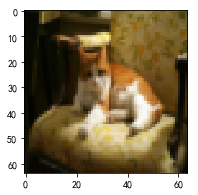

In [16]:
#展示图片
index = 7
plt.figure(figsize=(3,3))
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [17]:
train_x_orig.shape, train_y.shape, test_x_orig.shape, test_y.shape, classes.shape

((209, 64, 64, 3), (1, 209), (50, 64, 64, 3), (1, 50), (2,))

## 数据处理
<img src="images/imvectorkiank.png" style="width:450px;height:300px;">

### 数据规整

In [18]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T 
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

In [19]:
train_x_flatten.shape,test_x_flatten.shape

((12288, 209), (12288, 50))

### 数据标准化

In [20]:
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

In [21]:
train_x.max(),test_x.max()

(1.0, 1.0)

## $L$层神经网络模型
### 训练

In [22]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 2000, print_cost=False):
    """
    训练𝐿 层神经网络模型    
    Arguments:
    X -- 特征数据集, 形状=(特征数,样本数)
    Y -- 真实标签值（0 or 1）, 形状=(标签维数=1, 样本数=m)
    layers_dims -- (list) 从0到L，每一层的特征(节点)数
    learning_rate -- 梯度下降时设置的学习率
    num_iterations -- 迭代次数
    print_cost -- 是否展示成本值的变动情况，如果展示，每一百次采集一个点    
    Returns:
    parameters -- 模型学习到的最优参数，可以用作预测.
    """
    np.random.seed(1)
    costs = []# 保存每一次梯度下降时的成本值    
    # 参数初始化.
    parameters = initialize_parameters_deep(layers_dims)    
    # 循环梯度下降
    for i in range(0, num_iterations):
        # 前向传播
        AL, caches = L_model_forward(X, parameters)
        # 成本值
        cost = compute_cost(AL, Y)
        # 后向传播
        grads = L_model_backward(AL, Y, caches)
        # 梯度下降-更新参数.
        parameters = update_parameters(parameters, grads, learning_rate)
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)            
    # 展示成本值的下降
    plt.figure(figsize=(5,4))
    plt.plot(np.squeeze(costs))
    plt.ylabel('成本值')
    plt.xlabel('迭代(100次)')
    plt.title("学习率=" + str(learning_rate))
    plt.show()    
    return parameters

### 预测

In [23]:
def predict(X, y, parameters):
    """
    使用𝐿 层神经网络模型训练的参数进行预测    
    Arguments:
    X -- 测试特征数据
    y -- 测试标签数据
    parameters -- 训练模型得到的最优参数    
    Returns:
    p -- 测试集预测准确率
    """    
    m = X.shape[1]
    n = len(parameters) // 2 # 深层神经网络模型的层数
    p = np.zeros((1,m))
    probas, caches = L_model_forward(X, parameters)
    # 预测值离散化
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    print("准确率:"  + str(np.sum((p == y)/m)))
    return p

## 两层神经网络的应用

Cost after iteration 0: 0.695046
Cost after iteration 100: 0.589260
Cost after iteration 200: 0.523261
Cost after iteration 300: 0.449769
Cost after iteration 400: 0.420900
Cost after iteration 500: 0.372464
Cost after iteration 600: 0.347421
Cost after iteration 700: 0.317192
Cost after iteration 800: 0.266438
Cost after iteration 900: 0.219914
Cost after iteration 1000: 0.143579
Cost after iteration 1100: 0.453092
Cost after iteration 1200: 0.094994
Cost after iteration 1300: 0.080141
Cost after iteration 1400: 0.069402
Cost after iteration 1500: 0.060217
Cost after iteration 1600: 0.053274
Cost after iteration 1700: 0.047629
Cost after iteration 1800: 0.042976
Cost after iteration 1900: 0.039036
Cost after iteration 2000: 0.035683
Cost after iteration 2100: 0.032915
Cost after iteration 2200: 0.030472
Cost after iteration 2300: 0.028388
Cost after iteration 2400: 0.026615


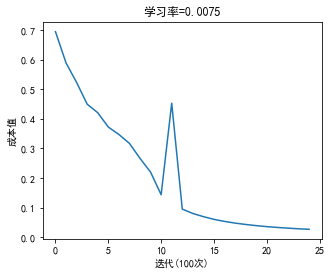

In [24]:
parameters = L_layer_model(train_x, train_y, [train_x.shape[0],7,1], num_iterations = 2500, print_cost = True)

In [25]:
pred_train=predict(train_x,train_y,parameters)

准确率:0.9999999999999998


In [26]:
pred_test=predict(test_x,test_y,parameters)

准确率:0.74


## 四层神经网络的应用

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


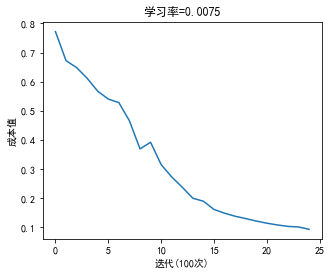

In [27]:
parameters = L_layer_model(train_x, train_y, [train_x.shape[0],20, 7, 5, 1], num_iterations = 2500, print_cost = True)

In [28]:
pred_train=predict(train_x,train_y,parameters)

准确率:0.9856459330143539


In [29]:
pred_test=predict(test_x,test_y,parameters)

准确率:0.8
